<a href="https://colab.research.google.com/github/AbhiramDream/git-files/blob/master/iml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#data preprocessing
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/application_data.csv')

# 1. Drop columns with more than 50% missing values
missing_percentage = df.isnull().mean() * 100
df = df.drop(columns=missing_percentage[missing_percentage > 50].index)

# 2. Impute missing values
# a. Impute numerical columns with the mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# b. Impute categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Display basic information about the processed data
print("\nData after mean/mode imputation:\n", df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

<class 'pandas.core.frame.DataFrame'>
Index: 17401 entries, 25 to 307415
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    17401 non-null  int64  
 1   TARGET                        17401 non-null  int64  
 2   NAME_CONTRACT_TYPE            17401 non-null  object 
 3   CODE_GENDER                   17401 non-null  object 
 4   FLAG_OWN_CAR                  17401 non-null  object 
 5   FLAG_OWN_REALTY               17401 non-null  object 
 6   CNT_CHILDREN                  17401 non-null  int64  
 7   AMT_INCOME_TOTAL              17401 non-null  float64
 8   AMT_CREDIT                    17401 non-null  float64
 9   AMT_ANNUITY                   17401 non-null  float64
 10  AMT_GOODS_PRICE               17401 non-null  float64
 11  NAME_TYPE_SUITE               17401 non-null  object 
 12  NAME_INCOME_TYPE              17401 non-null  object 
 13  NAME

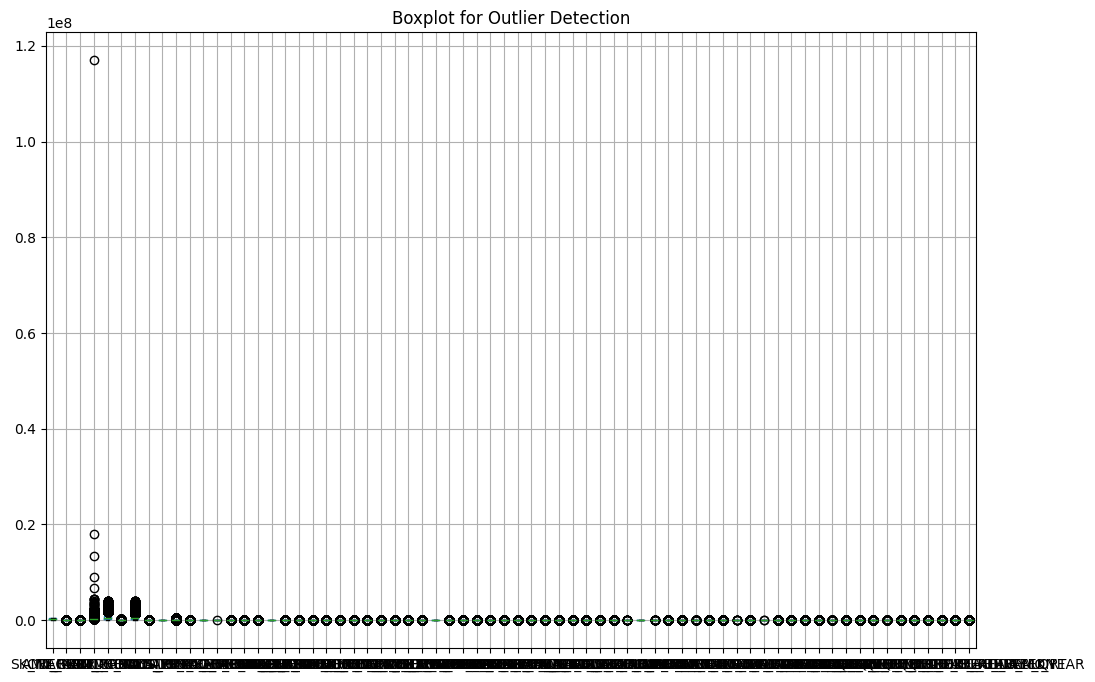

In [13]:
#outlier analysis
import numpy as np
import matplotlib.pyplot as plt

# Outlier Analysis

# Select numeric columns for outlier analysis
numeric_df = df.select_dtypes(include=['number'])

# 1. Identify Outliers using IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Outliers are values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# 2. Remove Outliers
df_no_outliers = df[~outliers.any(axis=1)]

print("\nData after removing outliers:\n", df_no_outliers.info())

# 3. Visualization - Boxplot
numeric_df.boxplot(figsize=(12, 8))
plt.title('Boxplot for Outlier Detection')
plt.show()


In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
data = pd.read_csv('/content/application_data.csv').select_dtypes(include=['number'])

# Handle missing values by filling with mean
data.fillna(data.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Output results
print("\nExtracted features (first few rows):\n", pd.DataFrame(data_pca).head())
print("\nExplained variance ratio:\n", pca.explained_variance_ratio_)



Extracted features (first few rows):
         0         1         2         3         4         5         6    \
0 -6.619369  1.525820  1.242865 -0.282571  0.232857  0.743911  0.315931   
1 -1.240186 -4.833787  0.322231  1.088341 -0.824860 -0.285493  0.933666   
2 -0.074371  0.426888 -0.832555 -1.043016  0.232585  0.592689 -1.868396   
3 -0.028067  0.182503 -0.429446 -0.077140  0.019053  0.121609 -0.245537   
4  0.015528 -0.158709  0.431240  0.095529  0.030183  0.115551 -1.317643   

        7         8         9    ...       96        97        98        99   \
0  5.153237  0.979286 -0.268424  ...  0.005353 -0.001839  0.000989  0.001289   
1 -0.602699  0.259655 -0.906317  ... -0.016518 -0.019156 -0.002140  0.000141   
2 -0.534480 -0.107792 -0.146196  ...  0.000047 -0.000110 -0.000150 -0.000416   
3  0.153486  0.007237 -0.267922  ... -0.001460  0.000370 -0.000060 -0.000496   
4 -0.754156  0.104574  0.922895  ...  0.000049 -0.000842  0.000611  0.000262   

        100       101       1


Number of Principal Components selected: 60

Reduced data (first few rows):
          0         1         2         3         4         5         6   \
0 -6.619369  1.525820  1.242864 -0.282572  0.232857  0.743911  0.315927   
1 -1.240186 -4.833787  0.322231  1.088340 -0.824860 -0.285493  0.933666   
2 -0.074371  0.426888 -0.832555 -1.043016  0.232585  0.592689 -1.868391   
3 -0.028067  0.182503 -0.429446 -0.077140  0.019053  0.121609 -0.245536   
4  0.015528 -0.158709  0.431240  0.095529  0.030182  0.115551 -1.317650   

         7         8         9   ...        50        51        52        53  \
0  5.153240  0.979285 -0.268408  ... -1.190335 -0.764663  0.872295  0.986630   
1 -0.602699  0.259654 -0.906316  ... -1.086483 -0.099290 -1.102230  0.652453   
2 -0.534484 -0.107789 -0.146201  ...  0.135159 -0.182200 -0.665867  0.774411   
3  0.153486  0.007236 -0.267924  ...  0.617478  0.689790  0.854792 -1.478766   
4 -0.754153  0.104573  0.922908  ...  0.648717 -0.343929  0.278546  0.2

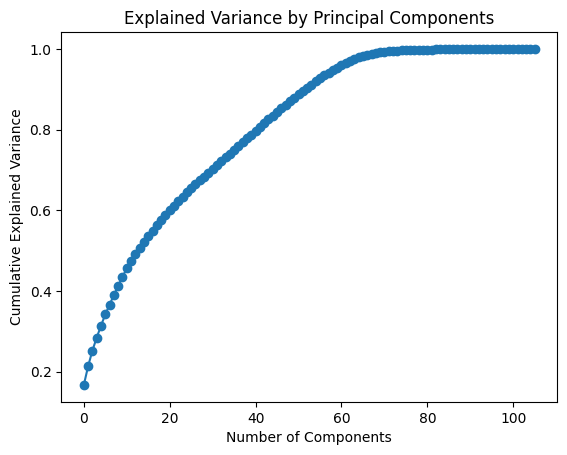

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Recompute PCA to get explained variance
pca = PCA().fit(data_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()

# Determine number of components to explain 95% variance
n_components = (explained_variance <= 0.95).sum() + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
data_pca_reduced = pca.fit_transform(data_scaled)

# Output results
print(f"\nNumber of Principal Components selected: {n_components}")
print("\nReduced data (first few rows):\n", pd.DataFrame(data_pca_reduced).head())

# Plot explained variance
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


Mean Squared Error: 0.07398422083370555

Model Coefficients:
 [-0.00495706]


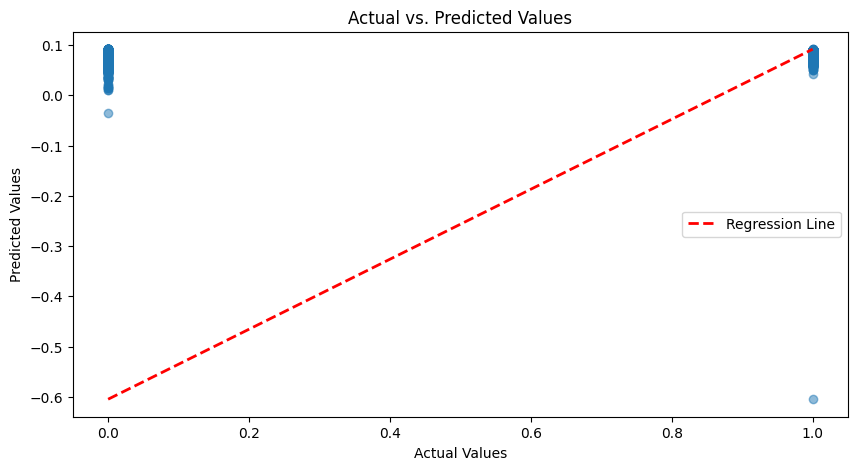

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/content/application_data.csv')

# Define features and target
X = data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']]
y = data['TARGET']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y = y.fillna(y.mean())

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component for visualization
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Print model coefficients
print("\nModel Coefficients:\n", model.coef_)

# Plotting
plt.figure(figsize=(10, 5))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Plot regression line with dotted line style
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2, label='Regression Line')

plt.legend()
plt.show()
